## Imports

In [14]:
import scipy.io
import numpy as np
from sklearn import linear_model 
from scipy import linalg
from sklearn import preprocessing as preproc # load preprocessing function
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from scipy.stats import linregress
from sklearn.model_selection import KFold
from statsmodels.sandbox.stats.multicomp import multipletests 
import warnings # to silence convergence warnings

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [15]:
mat = scipy.io.loadmat('sand.mat')

X = mat['X']
y = mat['Y']

[n,p] = X.shape

def center(X):
    return X - np.mean(X, axis=0)

def normalize(X):
    '''
    Function for normalizing the columns (variables) of a data matrix to unit length.
    Returns the normalized data and the euclidian lenghts of the variables 
    
    Input  (X) --------> The data matrix to be normalized 
    Output (X_pre)-----> The normalized data matrix 
    Output (d) --------> Array with the euclidian lenghts of the variables 
    '''
    d = np.linalg.norm(X,axis=0,ord=2)  # d is the the L2 norms of the variables
    d[d==0]=1                           # Avoid dividing by zero if column L2 norm is 0 
    X_pre = X / d                       # Normalize the data with the euclidian lengths
    return X_pre,d                      # Return normalized data and the euclidian lengths

### 2 Find an elastic net solution for the sand data, with suitable choices of regression parameters using cross validation.

>(a) Use the coordinate descent algorithm.

>>(i) Python: Use Python’s `linear_model.ElasticNet`.

>(b) Investigate how different values of α affects the number of nonzero parameters in the coordinate descent algorithms.
  
>(c) What are the pros and cons of the coordinate descent algorithm compared to using LARS?

Text(0.5, 1.0, 'Crossvalidated MSE of Elastic Net Fit Alpha = 0.00')

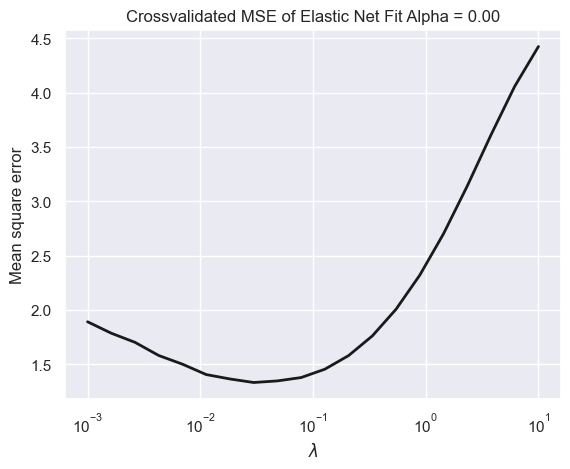

In [20]:
# set up a range of lambdas and an alpha value
alpha = 0.001
lambdas = np.logspace(-3, 1, num=20)
y_cen = center(y)
x_norm = normalize(center(X))[0]

with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")

    #Run the elasticNet model. You can implement Crossvalidation yourself or look at ElasticNetCV
    model = linear_model.ElasticNetCV(l1_ratio=alpha,alphas=lambdas, cv=5)
    model.fit(x_norm, y_cen)
plt.figure()
plt.semilogx(model.alphas_, model.mse_path_.mean(axis=-1), 'k',label='Average across the folds', linewidth=2)
plt.xlabel(r'$\lambda$')
plt.ylabel('Mean square error')
plt.title('Crossvalidated MSE of Elastic Net Fit Alpha = %.2f' % alpha)

Text(0.5, 1.0, 'Sum of coefficients of Elastic Net Fit Alpha = 0.00')

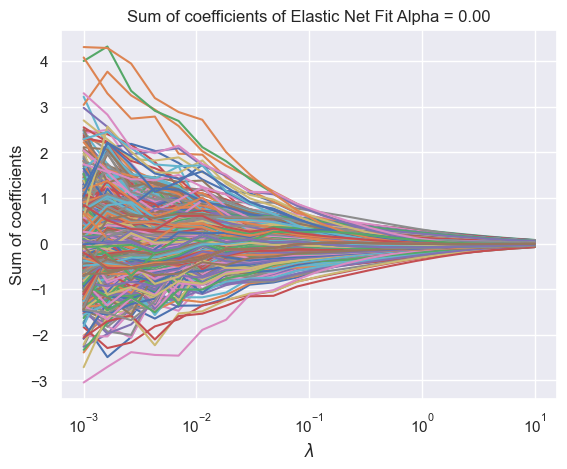

In [25]:
#To look at the coefficients we need to implement CV ourselves
CV = 5
kf = KFold(n_splits=CV)

coefs = np.zeros((CV,len(lambdas),p))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    #Get training data
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    y_test = center(y_test)
    y_train = center(y_train)
    X_train = normalize(center(X_train))[0]
    X_test = normalize(center(X_test))[0]

    
    

    for j, lambda_ in enumerate(lambdas):
        with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
            warnings.simplefilter("ignore")

            #Run the elasticNet model.
            model = linear_model.ElasticNet(l1_ratio = alpha, alpha=lambda_)
            model.fit(X_train, y_train)
            coefs[i,j,:] = model.coef_
        
trace = np.sum(coefs, axis=0)

plt.figure()
plt.semilogx(lambdas, trace)
plt.xlabel(r'$\lambda$')
plt.ylabel('Sum of coefficients')
plt.title('Sum of coefficients of Elastic Net Fit Alpha = %.2f' % alpha)